In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread("note.png")
img_show = img.copy()
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
th2 = cv2.adaptiveThreshold(img,255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,15,-2)
horizontal = th2
vertical = th2
rows,cols = horizontal.shape
horizontal_inv = cv2.bitwise_not(horizontal)
masked_img = cv2.bitwise_and(img, img, mask=horizontal_inv)
masked_img_inv = cv2.bitwise_not(masked_img)
horizontalsize = int(cols / 30)
horizontalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (horizontalsize,1))
horizontal = cv2.erode(horizontal, horizontalStructure, (-1, -1))
horizontal = cv2.dilate(horizontal, horizontalStructure, (-1, -1))
verticalsize = int(rows / 30)
verticalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (1, verticalsize))
vertical = cv2.erode(vertical, verticalStructure, (-1, -1))
vertical = cv2.dilate(vertical, verticalStructure, (-1, -1))
vertical = cv2.bitwise_not(vertical)
edges = cv2.adaptiveThreshold(vertical,255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,3,-2)
kernel = np.ones((2, 2), dtype = "uint8")
dilated = cv2.dilate(edges, kernel)
smooth = vertical.copy()
smooth = cv2.blur(smooth, (4,4))
(rows, cols) = np.where(img == 0)
vertical[rows, cols] = smooth[rows, cols]


(<AxesSubplot:title={'center':'After remove 5 note line'}>,
 Text(0.5, 1.0, 'After remove 5 note line'))

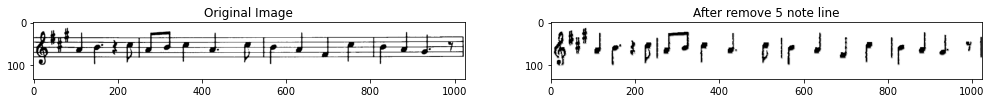

In [7]:
plt.figure(figsize = (17, 17)) , plt.subplot(121), plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)), plt.title("Original Image")
plt.subplot(122), plt.imshow(cv2.cvtColor(vertical, cv2.COLOR_BGR2RGB)), plt.title("After remove 5 note line")